In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('Placement_Data.csv')

In [4]:
df.head(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,NaN
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,NaN
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,NaN


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**ANALYSING DATA**

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['gender_male']=le.fit_transform(df['gender'])

df['workex']=le.fit_transform(df['workex'])




In [7]:
df.drop('gender',axis=1,inplace=True)

In [8]:
hsc_s=pd.get_dummies(df['hsc_s'],drop_first=True)
degree_t=pd.get_dummies(df['degree_t'],drop_first=True)
spl=pd.get_dummies(df['specialisation'],drop_first=True)


In [9]:
df=pd.concat([df,degree_t,hsc_s],axis=1)

In [10]:
df=pd.concat([df,spl],axis=1)

In [11]:
df.drop(['ssc_b','hsc_b','hsc_s','degree_t','specialisation'],axis=1,inplace=True)

In [12]:
df['status']=le.fit_transform(df['status'])

In [13]:
df.drop('sl_no',axis=1,inplace=True)

In [14]:
df.head()

,ssc_p,hsc_p,degree_p,workex,etest_p,mba_p,status,salary,gender_male,Others,Sci&Tech,Commerce,Science,Mkt&HR
0,67.00,91.00,58.00,0,55.0,58.80,1,270000.0,1,0,1,1,0,1
1,79.33,78.33,77.48,1,86.5,66.28,1,200000.0,1,0,1,0,1,0
2,65.00,68.00,64.00,0,75.0,57.80,1,250000.0,1,0,0,0,0,0
3,56.00,52.00,52.00,0,66.0,59.43,0,NaN,1,0,1,0,1,1
4,85.80,73.60,73.30,0,96.8,55.50,1,425000.0,1,0,0,1,0,0


**CHECKING FOR MISSING DATA
**

In [15]:
df.isna().sum()

ssc_p           0
hsc_p           0
degree_p        0
workex          0
etest_p         0
mba_p           0
status          0
salary         67
gender_male     0
Others          0
Sci&Tech        0
Commerce        0
Science         0
Mkt&HR          0
dtype: int64

In [16]:
df['salary'] = df["salary"].fillna(0)

In [17]:
df.isna().sum()

ssc_p          0
hsc_p          0
degree_p       0
workex         0
etest_p        0
mba_p          0
status         0
salary         0
gender_male    0
Others         0
Sci&Tech       0
Commerce       0
Science        0
Mkt&HR         0
dtype: int64

**PLOTTING**

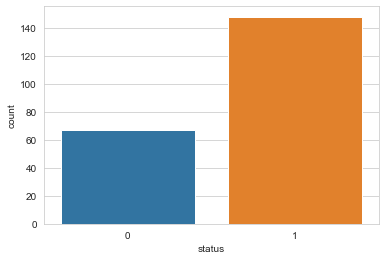

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='status',data=df)

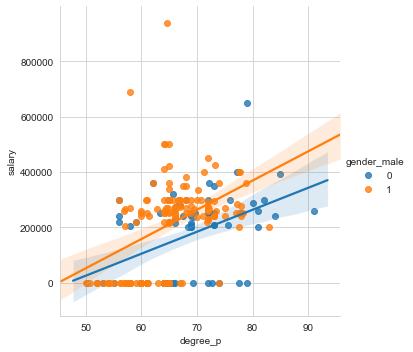

In [19]:
sns.lmplot(x='degree_p',y='salary',data=df,hue='gender_male')

In [20]:
X=df.drop('status',axis=1)
y=df['status']

In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
scaled_features=scaler.transform(X)
X_feat=pd.DataFrame(scaled_features,columns=df.columns.drop('status'))



**TRAINING DATA**

In [23]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_feat,y,test_size=0.3,random_state=42)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

**OUTPUT BEFORE ELBOW METHOD
**

In [25]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

[[17  4]
 [ 3 41]]


              precision    recall  f1-score   support

           0       0.85      0.81      0.83        21
           1       0.91      0.93      0.92        44

    accuracy                           0.89        65
   macro avg       0.88      0.87      0.88        65
weighted avg       0.89      0.89      0.89        65



**ELBOW METHOD
**

In [26]:
error_rate=[]

for i in range (1,40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i=knn.predict(X_test)
    error_rate.append(np.mean(pred_i!=y_test))
    

Text(0, 0.5, 'Error Rate')

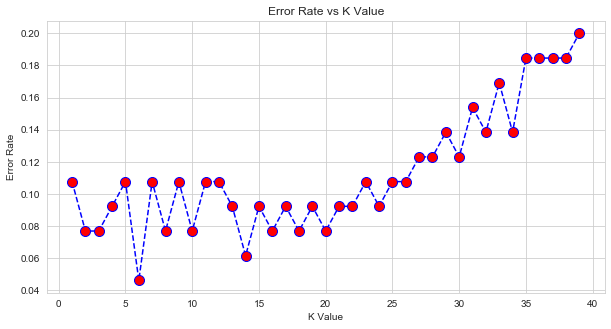

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,5))
plt.plot(range(1,40),error_rate,color='blue',linestyle='--',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K Value')
plt.ylabel('Error Rate')

**We observe from the graph that the best value for k is 6, therefore we will change the n_neighbors value to 5 and again check for accuracy.**

In [28]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
pred=knn.predict(X_test)

In [29]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print("\n")
print(classification_report(y_test,pred))

[[19  2]
 [ 1 43]]


              precision    recall  f1-score   support

           0       0.95      0.90      0.93        21
           1       0.96      0.98      0.97        44

    accuracy                           0.95        65
   macro avg       0.95      0.94      0.95        65
weighted avg       0.95      0.95      0.95        65

